# Plot Kmeans clusters stored in a GeoTiff

This is a notebook to just plot the GeoTiff created out of [kmeans_multiGeoTiffs_matrixTranspose](../Scala/kmeans_multiGeoTiffs_matrixTranspose.ipynb)

## Dependencies

In [18]:
import sys
sys.path.append("/usr/lib/spark/python")
sys.path.append("/usr/lib/spark/python/lib/py4j-0.10.4-src.zip")
sys.path.append("/usr/lib/python3/dist-packages")

import os
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"

import os
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "ipython"

from pyspark.mllib.clustering import KMeans, KMeansModel 
from pyspark import SparkConf, SparkContext

from osgeo import gdal
from io import BytesIO

import matplotlib.pyplot as plt
import rasterio
from rasterio import plot
from rasterio.io import MemoryFile

## Spark Context

In [19]:
appName = "plot_GeoTiff_clusters_python"
masterURL="spark://emma0.phenovari-utwente.surf-hosted.nl:7077"

try:
    sc.stop()
except NameError:
    print("A  new Spark Context will be created.")
    
sc = SparkContext(conf = SparkConf().setAppName(appName).setMaster(masterURL))

## Load File

In [20]:
clusters_path = "hdfs:///user/emma/spring-index/BloomFinal/clusters_200_75.tif"

clusters_data = sc.binaryFiles(clusters_path).take(1)
clusters_dataByteArray = bytearray(clusters_data[0][1])

## Print Metadata

In [21]:
clusters_dataset = MemoryFile(clusters_dataByteArray).open()
print(clusters_dataset.profile)

{'width': 7808, 'nodata': nan, 'transform': Affine(0.008983152841195215, 0.0, -126.30312894720473,
       0.0, -0.008983152841195215, 49.25462702827337), 'height': 3892, 'interleave': 'band', 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'dtype': 'float64', 'driver': 'GTiff', 'tiled': False}


## Plost the clusters

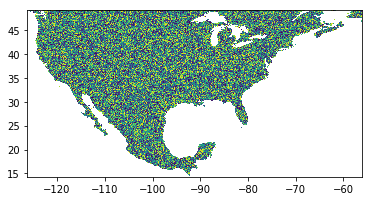

In [22]:
plot.show((clusters_dataset,1))